In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/rectangle/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().rectanglegrid(ar=16)

X.shape =  (10426, 2)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=5, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2606 points processed...
A_k, Atilde_k: 5212 points processed...
A_k, Atilde_k: 7818 points processed...
A_k, Atilde_k: 10424 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2606 points processed...
local_param: 5212 points processed...
local_param: 7818 points processed...
local_param: 10424 points processed...
local_param: all 10426 points processed...
After iter 1, max distortion is 18.408282
After iter 2, max distortion is 10.878137
After iter 3, max distortion is 9.842119
After iter 4, max distortion is 9.842119
After iter 5, max distortion is 9.842119
After iter 6, max distortion is 9.842119
Max local distortion = 9.842119410098237
###############
Took 95.5 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views 

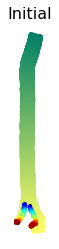

###############
Took 23.5 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0003921176340946429


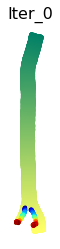

Iteration: 1
error: 0.0003942108061132585
Iteration: 2
error: 0.00039604627076557944
Iteration: 3
error: 0.0003995999174804455
Iteration: 4
error: 0.0003963979044065772
Iteration: 5
error: 0.00040078606264236377


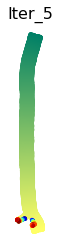

Iteration: 6
error: 0.0004100799106996608
Iteration: 7
error: 0.00040813646062004365
Iteration: 8
error: 0.00040327372003208474
Iteration: 9
error: 0.00039049451620643135
Iteration: 10
error: 0.0003840172756023844


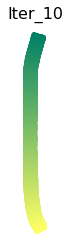

Iteration: 11
error: 0.00038240559116288714
Iteration: 12
error: 0.0003815672028138071
Iteration: 13
error: 0.00038098314674980913
Iteration: 14
error: 0.00038053432732531374
Iteration: 15
error: 0.0003801222805946232


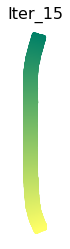

Iteration: 16
error: 0.00037977213410836917
Iteration: 17
error: 0.00037947275043870115
Iteration: 18
error: 0.0003791656933542504
Iteration: 19
error: 0.00037891066525294143


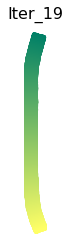

###############
Took 797.5 seconds to refine global embedding.
###############
###############
Took 828.4 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=75, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

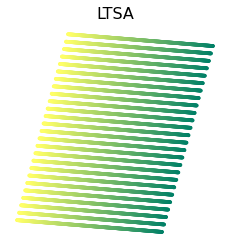

In [11]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.1, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

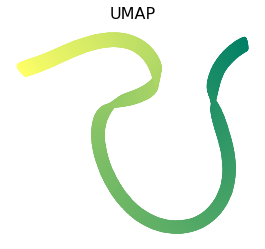

In [15]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=4, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

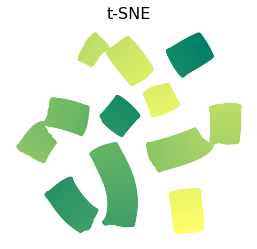

In [19]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')